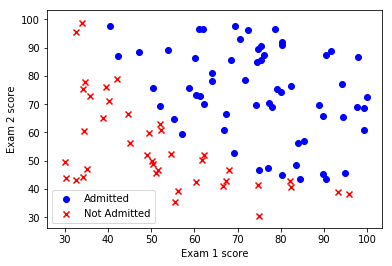

[0.5728525]
[0.65496115]
[0.03291569 5.96077485 6.69360017]
False
Linear search failed
0.534615781473061
0.6315448156594645
[-0.03592753 -1.3264426  -0.70138223]


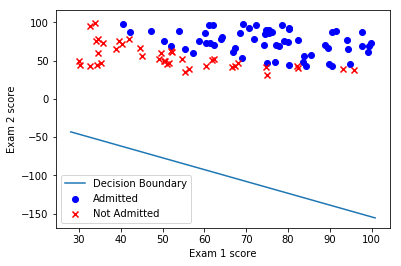


Accuracy: 0.600


In [12]:
from numpy import *
import matplotlib.pyplot as plt
import scipy.optimize as op

def sigmoid(z):
    # Computes the sigmoid of z.

    # ====================== YOUR CODE HERE ======================
    # Instructions: Implement the sigmoid function.
    return (1/(1+exp(-z)))
    # =============================================================
             

def cost(theta, X, y): 
    # Computes the cost using theta as the parameters for logistic regression. 
    
    # ====================== YOUR CODE HERE ======================
    # Instructions: Calculate the error J of the decision boundary
    #               that is described by theta (see the assignment 
    #               for more details).
    error = 0

    for i in range(X.shape[0]):
        error -= y[i]*log(sigmoid(theta[0]+theta[1]*X[i][1]+theta[2]*X[i][2]))
        error -= (1-y[i])*log(1-sigmoid(theta[0]+theta[1]*X[i][1]+theta[2]*X[i][2]))
    error /= X.shape[0]

    return error
    # =============================================================
    


def compute_grad(theta, X, y):
    # Computes the gradient of the cost with respect to
    # the parameters.
    
    grad = zeros(size(theta)) # initialize gradient
    
    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the gradient of cost for each theta.
    
    for i in range(X.shape[0]):
        grad[0] += sigmoid(theta[0]+theta[1]*X[i][0]+theta[2]*X[i][1])-y[i]
        grad[1] += X[i][1]*(sigmoid(theta[0]+theta[1]*X[i][1]+theta[2]*X[i][2])-y[i])
        grad[2] += X[i][2]*(sigmoid(theta[0]+theta[1]*X[i][1]+theta[2]*X[i][2])-y[i])
    grad[0] /= X.shape[0]
    grad[1] /= X.shape[0]
    grad[2] /= X.shape[0]
    
    # =============================================================
    
    return grad




def predict(theta, X):
    # Predict whether each label is 0 or 1 using learned logistic 
    # regression parameters theta. The threshold is set at 0.5
    
    # ====================== YOUR CODE HERE ======================
    # Instructions: Predict the label of each instance of the
    #               training set.
    
    resultats = ones(X.shape[0])
    for i in range(X.shape[0]):
        resultats[i] = floor(sigmoid(theta[0] + theta[1]*X[i][0] + theta[2]*X[i][1]) + 0.5)
    return resultats
    # =============================================================
    

#======================================================================
# Load the dataset
# The first two columns contains the exam scores and the third column
# contains the label.
data = loadtxt('./data/data.txt', delimiter=',')
 
X = data[:, 0:2]
y = data[:, 2]

# Plot data 
pos = where(y == 1) # instances of class 1
neg = where(y == 0) # instances of class 0
plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not Admitted'])
plt.show()


#Add intercept term to X
X_new = ones((X.shape[0], 3))
X_new[:, 1:3] = X
X = X_new

# Initialize fitting parameters
initial_theta = random.randn(3,1)*0.01

# Run minimize() to obtain the optimal theta
print(sigmoid(initial_theta[0]+initial_theta[1]*X[0][0]+initial_theta[2]*X[0][1]))
print(cost(initial_theta, X, y))
print(compute_grad(initial_theta, X, y))

Result = op.minimize(fun = cost, x0 = initial_theta, args = (X, y), method = 'TNC',jac = compute_grad);
theta = Result.x
print(Result.success)
print(Result.message)

print(sigmoid(theta[0]+theta[1]*X[0][0]+theta[2]*X[0][1]))
print(cost(theta, X, y))
print(compute_grad(theta, X, y))

# Plot the decision boundary
plot_x = array([min(X[:, 1]) - 2, max(X[:, 2]) + 2])
plot_y = (- 1.0 / theta[2]) * (theta[1] * plot_x + theta[0])
plt.plot(plot_x, plot_y)
plt.scatter(X[pos, 1], X[pos, 2], marker='o', c='b')
plt.scatter(X[neg, 1], X[neg, 2], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Decision Boundary', 'Admitted', 'Not Admitted'])
plt.show()

# Compute accuracy on the training set
p = predict(array(theta), X)
# Evaluation
accuracy = mean(p == y)
print("\nAccuracy: %4.3f" % accuracy)
